## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the data
df1 = pd.read_csv('AirPassengers.csv')

In [3]:
#Check data types
df1.dtypes

Month          object
#Passengers     int64
dtype: object

In [4]:
#Read Month col as date time data type
df1 = pd.read_csv('AirPassengers.csv', parse_dates= ['Month'])

In [5]:
df1.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [6]:
df1.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [7]:
#Making time series reference as the index
df1 = pd.read_csv('AirPassengers.csv', parse_dates= ['Month'], index_col= 'Month', infer_datetime_format= True)

In [8]:
df1.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
#Slicing
df1['1951-04-01': '1952-03-01']

,#Passengers
Month,
1951-04-01,163
1951-05-01,172
1951-06-01,178
1951-07-01,199
1951-08-01,199
1951-09-01,184
1951-10-01,162
1951-11-01,146
1951-12-01,166


In [10]:
df1.loc['1951-10-01']

#Passengers    162
Name: 1951-10-01 00:00:00, dtype: int64

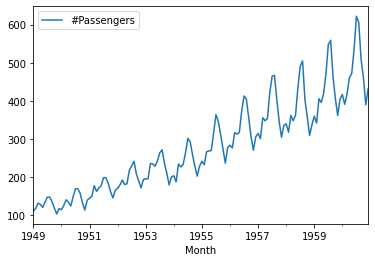

In [11]:
#Plot time-series
df1.plot()
plt.show()

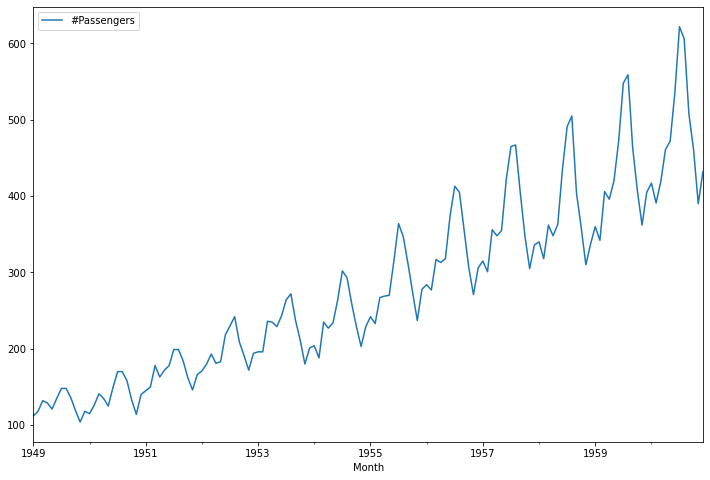

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,8
df1.plot()
plt.show()

## Checking stationarity of the series

In [13]:
#Determining Rolling Statistics

rolmean = df1.rolling(window = 12).mean()
rolstd = df1.rolling(window = 12).std()
print(rolmean, rolstd) 

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


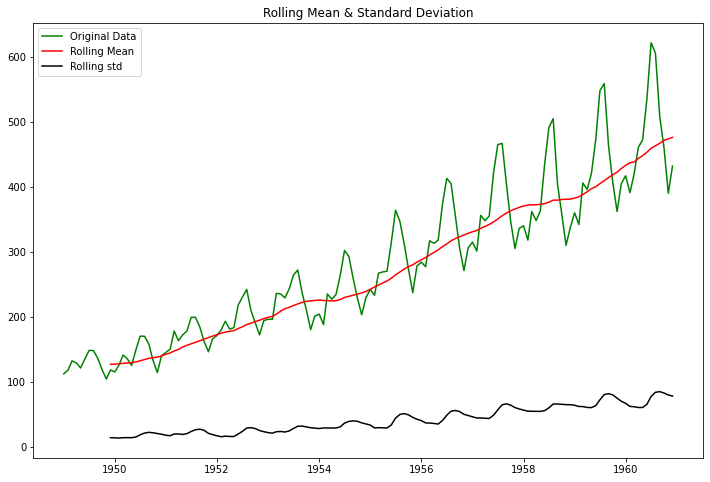

In [14]:
#PLotting rolling statistics
orig_data = plt.plot(df1, color= 'green', label= 'Original Data')
mean = plt.plot(rolmean, color= 'Red', label= 'Rolling Mean')
std = plt.plot(rolstd, color= 'Black', label= 'Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block= False)

In [15]:
#Performing Dickey-Fuller test:

from statsmodels.tsa.stattools import adfuller
print("Results of Dickey-Fuller test:")
dftest = adfuller(df1['#Passengers'], autolag= 'AIC')

dfoutput = pd.Series(dftest[0:4], index= ['Test Statistic', 'p-value', '#Lags used', 'Number of observations used'])
for key,value in dftest[4].items():
    dfoutput['Ctritical value (%s)'%key] = value

print(dfoutput)

Results of Dickey-Fuller test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags used                      13.000000
Number of observations used    130.000000
Ctritical value (1%)            -3.481682
Ctritical value (5%)            -2.884042
Ctritical value (10%)           -2.578770
dtype: float64


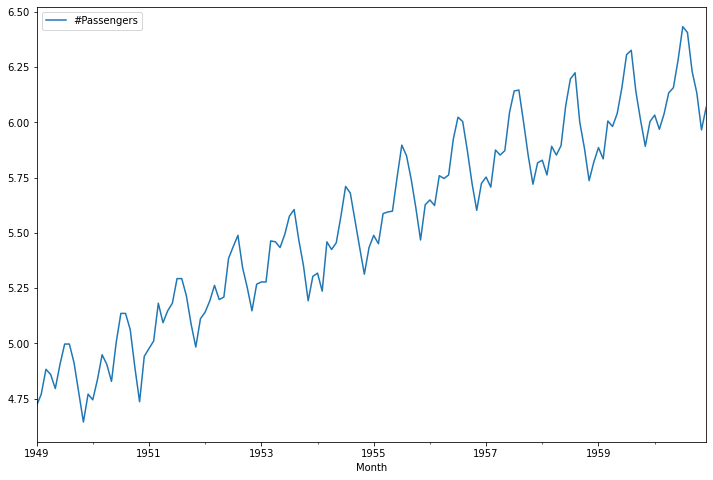

In [16]:
#Using Rolling Statistics & Dickey-Fuller test we got to know that the data is not stationary.

#Estimating trend:
#Log transformation
df1_log = df1.copy()
df1_log = np.log(df1)
df1_log.plot()
plt.show()

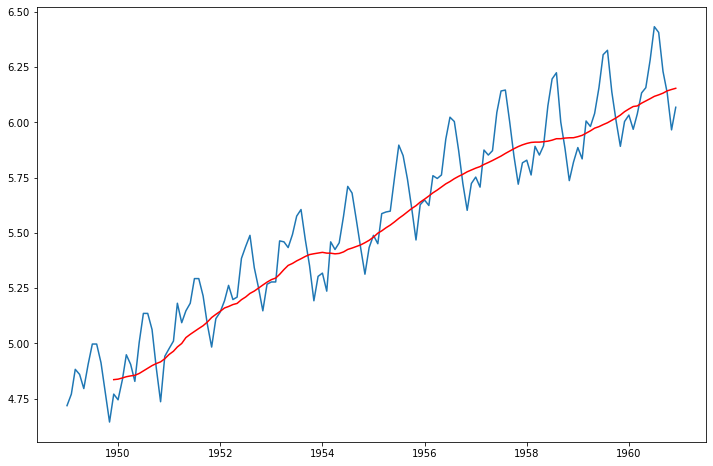

In [17]:
movingAverage = df1_log.rolling(window =12).mean()
movingSTD = df1_log.rolling(window =12).std()
plt.plot(df1_log)
plt.plot(movingAverage, color= 'red')
plt.show()

In [18]:
#Taking difference betweeen Log scale data and Moving Average to make it stationary
df1_diff = df1_log - movingAverage
df1_diff.head(12)

#Removing NaN values
df1_diff.dropna(inplace=True)
df1_diff.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [19]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    movingAverage = timeseries.rolling(window =12).mean()
    movingSTD = timeseries.rolling(window =12).std()
    
    #PLotting rolling statistics
    orig_data = plt.plot(timeseries, color= 'green', label= 'Original Data')
    mean = plt.plot(movingAverage, color= 'Red', label= 'Rolling Mean')
    std = plt.plot(movingSTD, color= 'Black', label= 'Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block= False)

    print("Results of Dickey-Fuller test:")
    dftest = adfuller(timeseries['#Passengers'], autolag= 'AIC')
    dfoutput = pd.Series(dftest[0:4], index= ['Test Statistic', 'p-value', '#Lags used', 'Number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Ctritical value (%s)'%key] = value

    print(dfoutput)

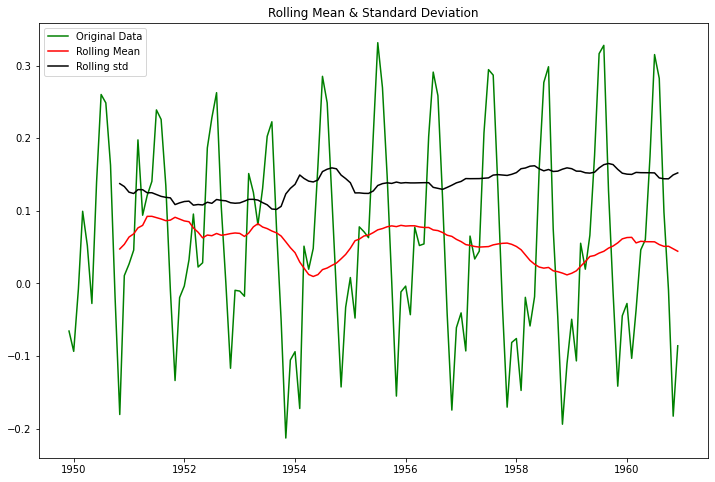

Results of Dickey-Fuller test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags used                      13.000000
Number of observations used    119.000000
Ctritical value (1%)            -3.486535
Ctritical value (5%)            -2.886151
Ctritical value (10%)           -2.579896
dtype: float64


In [20]:
test_stationarity(df1_diff)

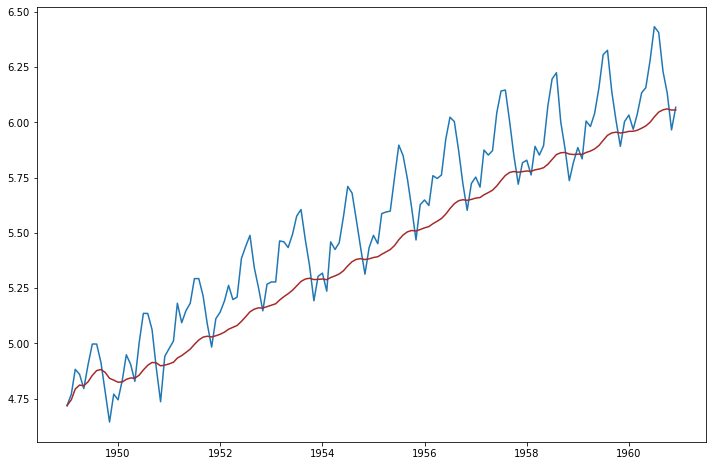

In [21]:
#Calculating weighted-average to look at the trend present in the time-series
expDeacy_WgtAvg = df1_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(df1_log)
plt.plot(expDeacy_WgtAvg, color= 'brown')
plt.show()

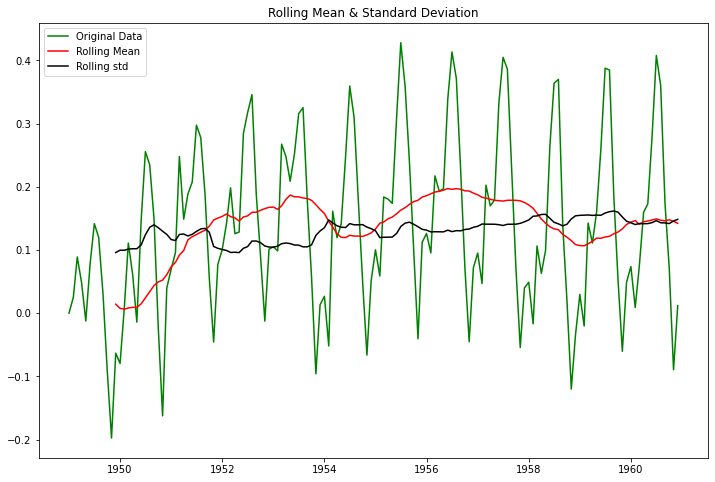

Results of Dickey-Fuller test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags used                      13.000000
Number of observations used    130.000000
Ctritical value (1%)            -3.481682
Ctritical value (5%)            -2.884042
Ctritical value (10%)           -2.578770
dtype: float64


In [22]:
df1_diff_expDecayAvg = df1_log - expDeacy_WgtAvg
test_stationarity(df1_diff_expDecayAvg)

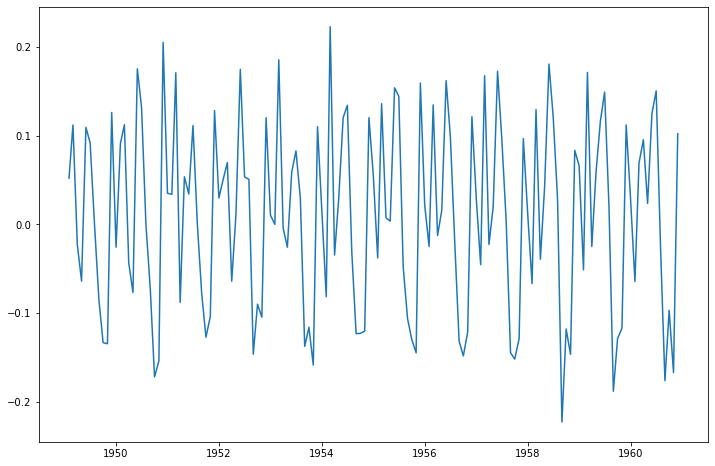

In [23]:
#Shifting the values by 1.
df1_logdiff_shift = df1_log - df1_log.shift()
plt.plot(df1_logdiff_shift)
plt.show()

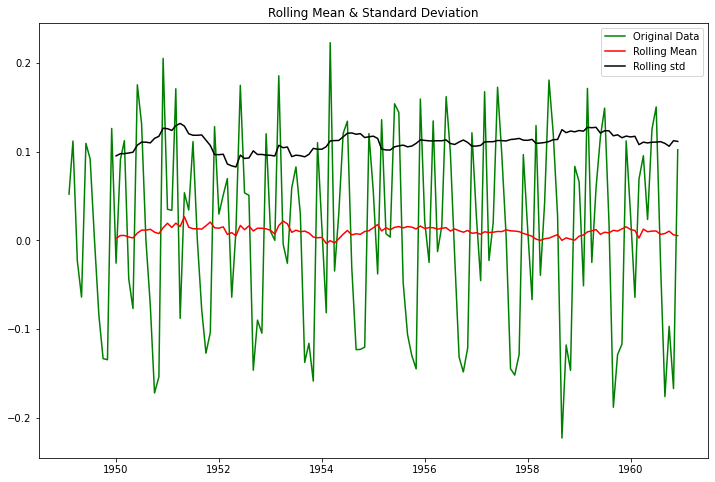

Results of Dickey-Fuller test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags used                      14.000000
Number of observations used    128.000000
Ctritical value (1%)            -3.482501
Ctritical value (5%)            -2.884398
Ctritical value (10%)           -2.578960
dtype: float64


In [24]:
df1_logdiff_shift.dropna(inplace=True)
test_stationarity(df1_logdiff_shift)

In [25]:
#Upward trend and seasonality.

## Decomposing Time-Series

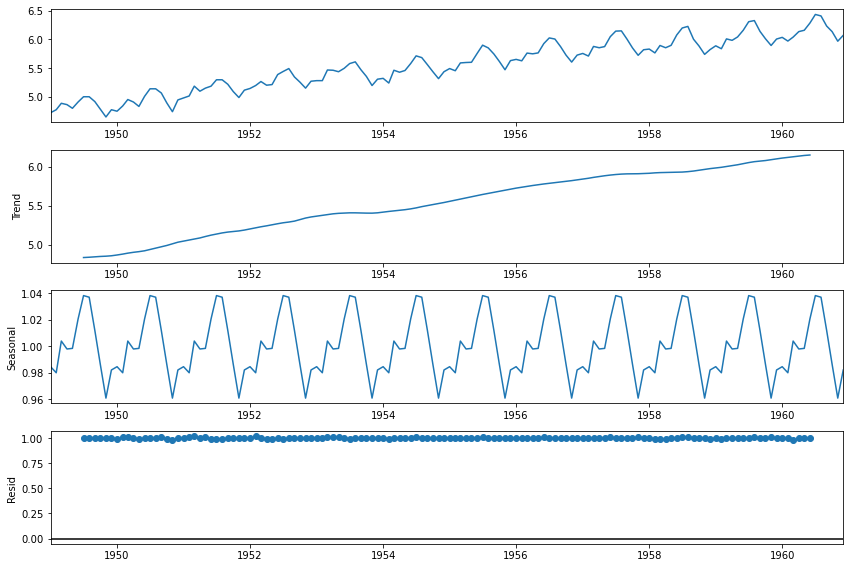

In [26]:
#Decomposing the time series multiplicatively
#Using Multiplicative model since seasonality is not constant.
df1_mul_decompose = seasonal_decompose(df1_log, model = "multiplicative")
df1_mul_decompose2 = seasonal_decompose(df1_log)

df1_mul_decompose.plot()
plt.show()

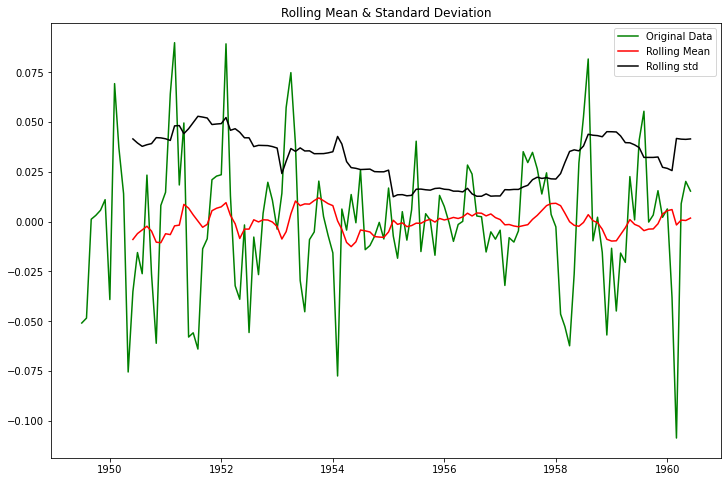

Results of Dickey-Fuller test:


KeyError: '#Passengers'

In [78]:
#Checking noise if it's stationary or not. 
decomposedLogData = df1_mul_decompose2.resid
decomposedLogData.dropna(inplace= True)
test_stationarity(decomposedLogData)
# decomposedLogData.plot()
# plt.show()
# print(decomposedLogData)

### Run code cells manually one by one from here if it stops on above cell

## ACF and PACF plots:

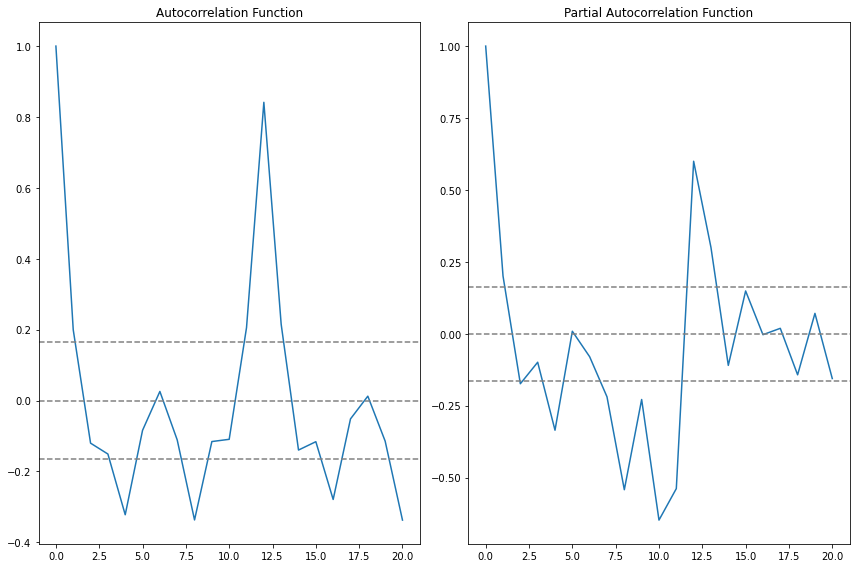

In [28]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(df1_logdiff_shift, nlags= 20)
lag_pacf = pacf(df1_logdiff_shift, nlags= 20, method= 'ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y= 0, linestyle = '--', color= 'gray')
plt.axhline(y= -1.96/np.sqrt(len(df1_logdiff_shift)), linestyle = '--', color= 'gray')
plt.axhline(y= 1.96/np.sqrt(len(df1_logdiff_shift)), linestyle = '--', color= 'gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y= 0, linestyle = '--', color= 'gray')
plt.axhline(y= -1.96/np.sqrt(len(df1_logdiff_shift)), linestyle = '--', color= 'gray')
plt.axhline(y= 1.96/np.sqrt(len(df1_logdiff_shift)), linestyle = '--', color= 'gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

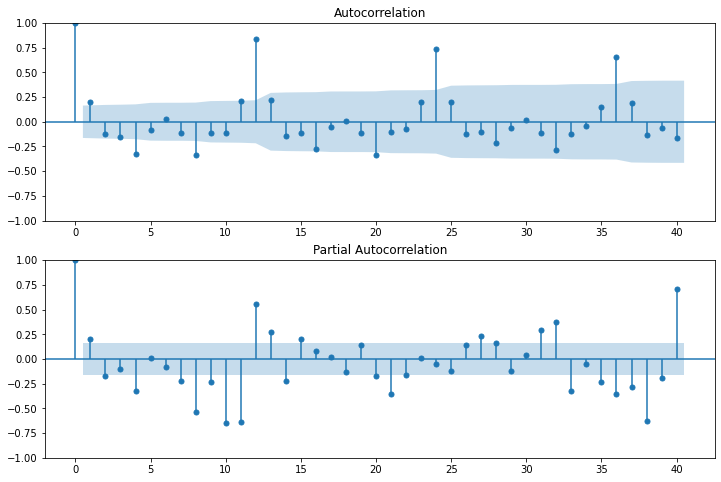

In [29]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df1_logdiff_shift, lags = 40, ax= ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df1_logdiff_shift, lags = 40, ax= ax2)

## Building AR and MA Models

In [43]:
# !pip install statsmodels==0.12.2

Plotting AR model


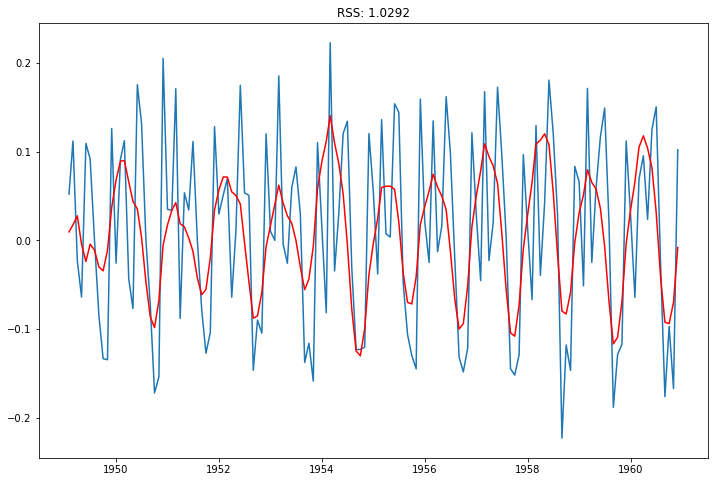

In [45]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL:
mod = ARIMA(df1_log, order=(2, 1, 2))
res_AR = mod.fit(disp = -1)
plt.plot(df1_logdiff_shift)
plt.plot(res_AR.fittedvalues, color= 'red')

plt.title('RSS: %.4f'% sum((res_AR.fittedvalues-df1_logdiff_shift["#Passengers"])**2))
print('Plotting AR model')

Plotting MA model


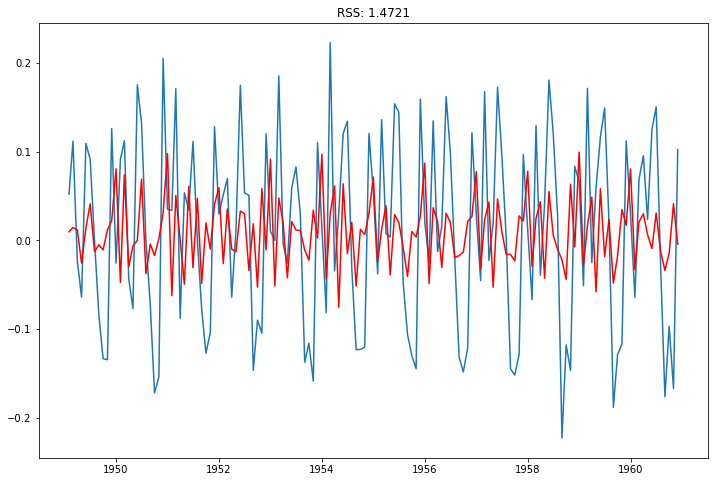

In [53]:
#MA MODEL:
model = ARIMA(df1_log, order= (0, 1, 2))
res_MA = model.fit(disp= -1)
plt.plot(df1_logdiff_shift)
plt.plot(res_MA.fittedvalues, color= 'red')

plt.title('RSS: %.4f'% sum((res_MA.fittedvalues-df1_logdiff_shift["#Passengers"])**2))
print('Plotting MA model')

Plotting ARIMA model


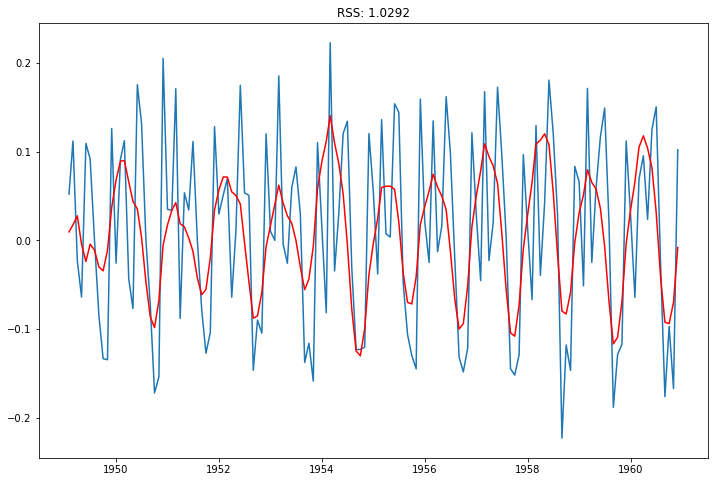

In [55]:
model = ARIMA(df1_log, order= (2, 1, 2))
res_ARIMA = model.fit(disp= -1)
plt.plot(df1_logdiff_shift)
plt.plot(res_ARIMA.fittedvalues, color= 'red')

plt.title('RSS: %.4f'% sum((res_ARIMA.fittedvalues-df1_logdiff_shift["#Passengers"])**2))
print('Plotting ARIMA model')

In [57]:
predictions_ARIMA_diff = pd.Series(res_ARIMA.fittedvalues, copy= True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [60]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [63]:
predictions_ARIMA_log = pd.Series(df1_log["#Passengers"].iloc[0], index= df1_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value = 0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

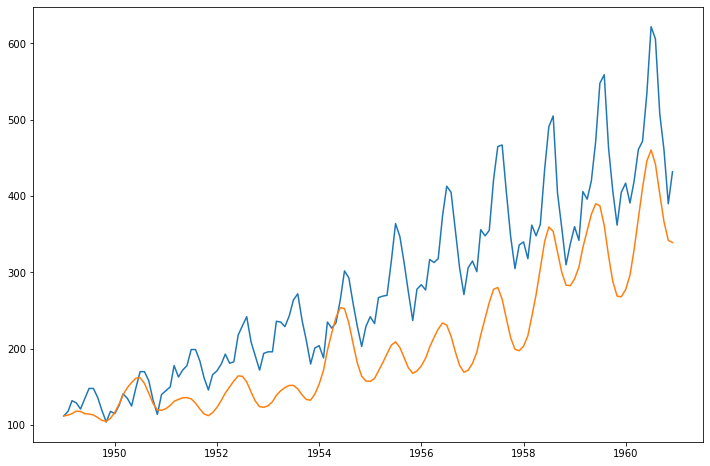

In [66]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df1)
plt.plot(predictions_ARIMA)
plt.show()

In [73]:
df1_log.size

144

## Making predictions from previous data points

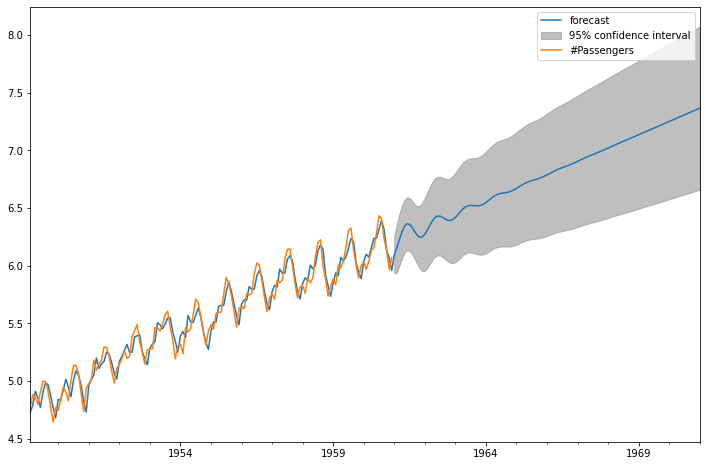

In [67]:

res_ARIMA.plot_predict(1, 264) # 144 previous data points + 120 new data point predictions
x= res_ARIMA.forecast(steps= 120) #120 steps because 12 data points in 1 year x 10 years = 120 data points for 10 years

In [70]:
len(x[1])

120

In [72]:
x[1]

array([0.08384711, 0.10749461, 0.11568693, 0.11702774, 0.11703495,
       0.11744016, 0.11762248, 0.11778712, 0.12024162, 0.12736043,
       0.13870962, 0.15118796, 0.16157817, 0.16834398, 0.17177332,
       0.17311986, 0.17358736, 0.17385463, 0.17430221, 0.17543335,
       0.17788151, 0.18195727, 0.18726223, 0.19283399, 0.19769251,
       0.20130646, 0.20369063, 0.2051984 , 0.20625276, 0.20721006,
       0.20836979, 0.21000335, 0.21229752, 0.21524487, 0.21860188,
       0.22198266, 0.22503075, 0.22755305, 0.22954817, 0.23114809,
       0.23253836, 0.23390545, 0.23541321, 0.23718323, 0.23926549,
       0.24161549, 0.24410383, 0.24656369, 0.24885269, 0.25089642,
       0.25269746, 0.25431641, 0.25584325, 0.25737241, 0.25898403,
       0.26072863, 0.26261561, 0.26461103, 0.26664912, 0.26865495,
       0.27056863, 0.27236111, 0.27403716, 0.27562789, 0.27717844,
       0.27873542, 0.28033606, 0.28200033, 0.28372698, 0.28549526,
       0.28727226, 0.28902361, 0.29072353, 0.29236099, 0.29394

In [77]:
#END